<a href="https://colab.research.google.com/github/pradosh2024/langgraph_playground/blob/main/005_looping_counter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
%pip install langgraph --quiet

from typing import  List,TypedDict
import random
from langgraph.graph import StateGraph,START, END

In [4]:
class AgentState(TypedDict):
  name : str
  number : List[int]
  counter : int



In [5]:
def greeting_node(state: AgentState) -> AgentState:
  state["name"] = "Hi" + state["name"]
  state["counter"] = 0
  return state

def random_node(state: AgentState) -> AgentState:
  state["number"].append(random.randint(0,10))
  state["counter"] += 1
  return state

def should_continue(state: AgentState) -> AgentState:
  if state["counter"] <5:
    print("Entering Loop" , state["counter"])
    return "loop"
  else:
    return "Exit"




In [8]:
graph = StateGraph(AgentState)

graph.add_node("greeting", greeting_node)
graph.add_node("random", random_node)
graph.add_edge("greeting", "random")

graph.add_conditional_edges(
    "random",
    should_continue,
    {
        "loop" : "random",
        "Exit" : END
    }

)

graph.set_entry_point("greeting")
app = graph.compile()


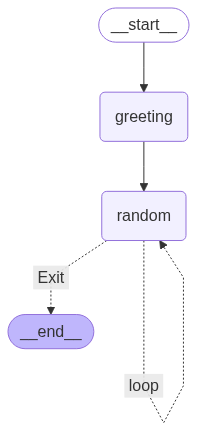

In [9]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [10]:
app.invoke({"name":"Vaibhav", "number":[], "counter":-100})

Entering Loop 1
Entering Loop 2
Entering Loop 3
Entering Loop 4


{'name': 'HiVaibhav', 'number': [8, 2, 8, 5, 3], 'counter': 5}